In [71]:
import numpy as np
import os
import pickle

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)
from scipy.stats import linregress

In [72]:
itrtime_pklfile = 'trendfiltering_time_per_iteration.pkl'
itrtime_plotprefix = 'time_per_iteration'

with open(itrtime_pklfile, 'rb') as handle:
    itrtime = pickle.load(handle)

In [73]:
degree = 0
method = 'cavi'

In [74]:
np.array([k for k in mdict.keys() if k > 100])

array([  128,   256,   512,  1024,  2048,  4096,  8192, 16384])

In [75]:
mdict = {n : x for n, x in itrtime[degree][method].items() if n > 100}

In [76]:
np.array(list(mdict.keys()))

array([  128,   256,   512,  1024,  2048,  4096,  8192, 16384])

In [77]:
np.array([np.mean(list(x.values())) for x in mdict.values()])

array([0.00252997, 0.00342996, 0.00445613, 0.00754554, 0.01767555,
       0.06198478, 0.2068339 , 0.81628802])

In [78]:
[np.std(list(x.values()), ddof = 0) for n, x in mdict.items() if n > 100]

[0.0003821220759395866,
 0.0012234802927436844,
 0.0004567663784337063,
 0.0012456800711910052,
 0.0007431820239339514,
 0.0004612355003737906,
 0.013839005976324129,
 0.013850336272051044]

In [79]:
[np.std(list(x.values())) for n, x in mdict.items() if n > 100]

[0.0003821220759395866,
 0.0012234802927436844,
 0.0004567663784337063,
 0.0012456800711910052,
 0.0007431820239339514,
 0.0004612355003737906,
 0.013839005976324129,
 0.013850336272051044]

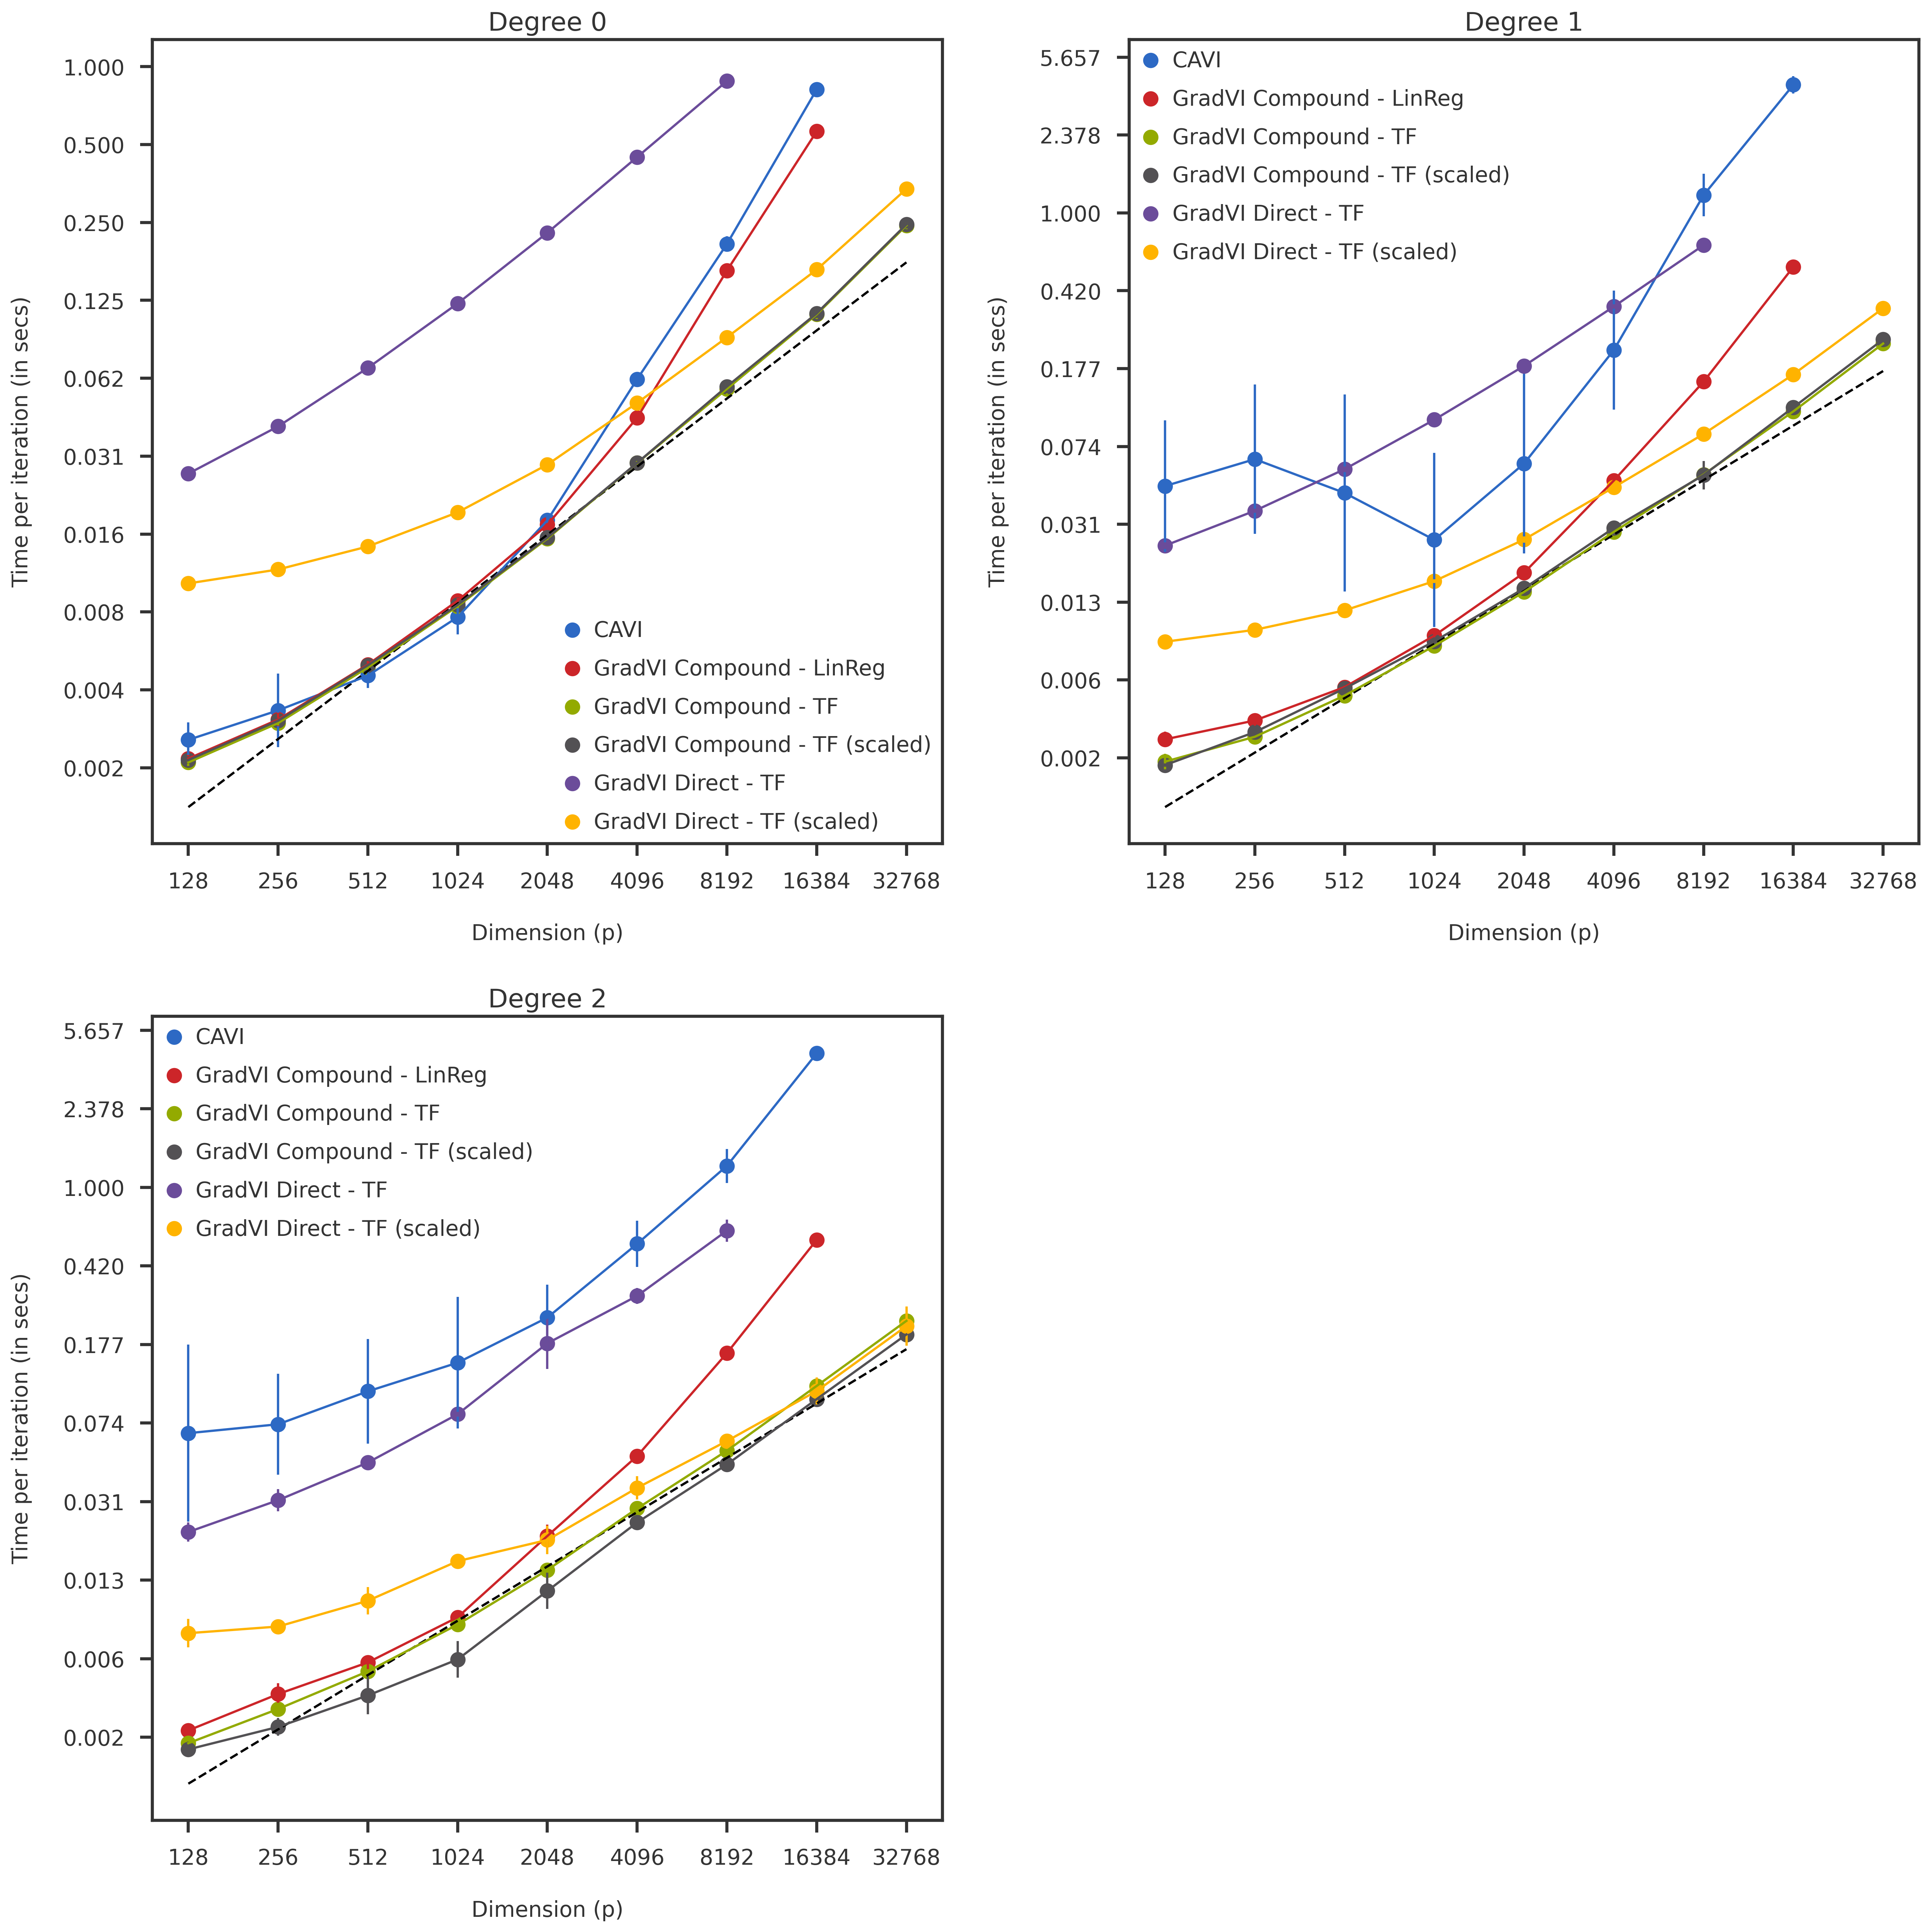

In [96]:
def get_xy(itrtime, method, degree = 0):
    mdict = {n : x for n, x in itrtime[method].items() if n > 100}
    x = np.array(list(mdict.keys()))
    y = [np.array(list(x.values())) for x in mdict.values()]
    return x, y

def plot_func(ax, x, y, label = ''):
    ymean = np.mean(np.log2(y), axis = 1)
    ystd  = np.std(np.log2(y), ddof = 1, axis = 1)
    ax.scatter(np.log2(x), ymean, label = label, s = 80)
    #ax.plot(np.log2(x), np.log2(y))
    ax.errorbar(np.log2(x), ymean, yerr = ystd)
    return


def show_linear_scale(ax, itrtime, method, imin = 2, imax = 4):
    mdict = {n : x for n, x in itrtime[method].items() if n > 100}
    dims  = np.array(list(mdict.keys()))
    yvals = np.array([np.mean(list(x.values())) for x in mdict.values()])
    x = np.log2(dims[imin : imax + 1])
    y = np.log2(yvals[imin : imax + 1])
    linreg = linregress(x, y)
    ylinreg = linreg.intercept + linreg.slope * np.log2(dims)
    ax.plot(np.log2(dims), ylinreg, ls = 'dashed', color = 'black')
    return

fig = plt.figure(figsize = (18, 18))
ax = list([None for i in range(3)])
for i in range(3):
    ax[i] = fig.add_subplot(2, 2, i + 1)

    degree = i
    tdict = itrtime[degree]
    
    x, y = get_xy(tdict, 'cavi')
    plot_func(ax[i], x, y, label = 'CAVI')

    x, y = get_xy(tdict, 'gradvi')
    plot_func(ax[i], x, y, label = 'GradVI Compound - LinReg')

    x, y = get_xy(tdict, 'gradvi_tf')
    plot_func(ax[i], x, y, label = 'GradVI Compound - TF')

    x, y = get_xy(tdict, 'gradvi_tf_scaled')
    plot_func(ax[i], x, y, label = 'GradVI Compound - TF (scaled)')

    x, y = get_xy(tdict, 'gradvi_tf_direct')
    plot_func(ax[i], x, y, label = 'GradVI Direct - TF')

    x, y = get_xy(tdict, 'gradvi_tf_direct_scaled')
    plot_func(ax[i], x, y, label = 'GradVI Direct - TF (scaled)')

    mpl_utils.set_yticks(ax[i], scale = 'log2', spacing = 'log2',  kmin = 5, kmax = 10, fmt = '{:.3f}')
    mpl_utils.set_xticks(ax[i], scale = 'log2', spacing = 'log2',  kmin = 5, fmt = '{:.0f}')
    #mpl_utils.set_ymax(ax1, 0.6, scale = 'log2')

    show_linear_scale(ax[i], tdict, 'gradvi_tf', imin = 2, imax = 5)

    ax[i].legend()
    ax[i].set_ylabel("Time per iteration (in secs)")
    ax[i].set_xlabel("Dimension (p)")
    ax[i].set_title(f"Degree {i}")

fig.savefig(f"{itrtime_plotprefix}.pdf", bbox_inches = 'tight')
plt.tight_layout(pad = 2.0)
plt.show()

In [81]:
x, y = get_xy(tdict, 'gradvi_tf_direct_scaled')

In [59]:
x.shape

(8,)

In [66]:
np.log2(np.mean(y, axis = 1))

array([-6.63311857, -6.45382931, -6.15880057, -5.72148486, -5.10819157,
       -4.31664932, -3.47350337, -2.60499911, -1.56907901])

In [68]:
np.mean(np.log2(y), axis = 1)

array([-6.63401074, -6.45499676, -6.15963973, -5.72166397, -5.1082998 ,
       -4.31678584, -3.47523956, -2.60574776, -1.56919162])

In [49]:
y

array([0.01007471, 0.01140785, 0.0139964 , 0.01895228, 0.0289922 ,
       0.05018328, 0.09002669, 0.16436795, 0.33702348])

In [50]:
np.log2(y)

array([-6.63311857, -6.45382931, -6.15880057, -5.72148486, -5.10819157,
       -4.31664932, -3.47350337, -2.60499911, -1.56907901])

In [51]:
np.log2(yerr)

array([-11.39407179, -11.02721589, -10.96605883, -11.63349495,
       -11.38321378, -10.42821751,  -7.72594428,  -7.44469559,
        -7.81325416])